This is following the work in 02-MLPClassification_LowerBackPain.ipynb

In [1]:
# imports
import sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
spine_data = pd.read_csv('datasets/spine_data.csv',
                         skiprows=1,
                         names = ['pelvic_incidence',
                                  'pelvic tilt',
                                  'lumbar_lordosis_angle',
                                  'sacral_slope',
                                  'pelvic_radius',
                                  'degree_spondylolisthesis',
                                  'pelvic_slope',
                                  'direct_tilt',
                                  'thoracic_slope',
                                  'cervical_tilt',
                                  'sacrum_angle',
                                  'scoliosis_slope',
                                  'class'])

In [3]:
spine_data = spine_data.sample(frac=1).reset_index(drop=True)

In [4]:
spine_data.head(10)

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class
0,58.828379,37.577873,125.742385,21.250506,135.629418,117.314683,0.751482,12.6576,15.9381,15.23920,-15.444826,7.2157,Abnormal
1,63.772391,12.763385,65.360524,51.009006,89.822741,55.995454,0.276928,24.5529,10.4232,14.97470,-22.286220,21.7822,Abnormal
2,46.855781,15.351514,38.000000,31.504267,116.250917,1.662706,0.121465,30.2830,14.6233,8.75046,4.334375,16.8302,Abnormal
3,115.923261,37.515436,76.800000,78.407825,104.698603,81.198927,0.542816,22.3317,8.8519,11.48960,-6.754004,32.5082,Abnormal
4,46.236399,10.062770,37.000000,36.173629,128.063620,-5.100053,0.860784,9.5912,15.1769,16.49989,-22.420021,40.2061,Normal
5,36.157830,-0.810514,33.627314,36.968344,135.936910,-2.092507,0.332027,10.4752,17.1414,13.60366,-12.162522,28.3449,Normal
6,42.918041,-5.845994,58.000000,48.764035,121.606859,-3.362045,0.542971,12.4697,8.5981,9.07771,-27.627390,12.7281,Normal
7,37.731992,9.386298,42.000000,28.345694,135.740926,13.683047,0.465170,28.9703,10.2016,11.24951,-19.160909,34.0011,Normal
8,83.879941,23.077427,87.141512,60.802514,124.646072,80.555605,0.436933,7.2994,11.1917,16.28150,-8.553212,24.8562,Abnormal
9,68.721910,49.431864,68.056012,19.290046,125.018517,54.691289,0.379895,17.4281,16.0009,14.48126,-31.852569,30.5330,Abnormal


In [5]:
spine_data.shape

(310, 13)

In [6]:
spine_data[spine_data.isnull().any(axis=1)].count() . # check if there are any fields with missing values

pelvic_incidence            0
pelvic tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope                0
direct_tilt                 0
thoracic_slope              0
cervical_tilt               0
sacrum_angle                0
scoliosis_slope             0
class                       0
dtype: int64

In [7]:
spine_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082
pelvic_slope,310.0,0.472979,0.285787,0.003220,0.224367,0.475989,0.704846,0.998827
direct_tilt,310.0,21.321526,8.639423,7.027000,13.054400,21.907150,28.954075,36.743900
thoracic_slope,310.0,13.064511,3.399713,7.037800,10.417800,12.938450,15.889525,19.324000
cervical_tilt,310.0,11.933317,2.893265,7.030600,9.541140,11.953835,14.371810,16.821080


In [8]:
from sklearn import preprocessing

In [9]:
label_encoding = preprocessing.LabelEncoder()

spine_data['class'] = label_encoding.fit_transform(spine_data['class'].astype(str))

In [10]:
spine_data.sample(10)

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class
14,33.788843,3.675110,25.500000,30.113733,128.325356,-1.776111,0.389858,9.6730,11.3129,13.23731,-2.244119,10.2925,1
196,56.535051,14.377189,44.991547,42.157862,101.723334,25.773174,0.052602,31.0079,14.4887,14.17105,-31.121553,32.2469,0
127,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,0
171,78.491730,22.181798,60.000000,56.309932,118.530327,27.383213,0.008486,7.5647,12.6737,8.03422,-22.037558,32.0972,0
190,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,0.527584,26.3756,18.6012,16.09596,-18.701330,35.8729,0
191,53.941658,9.306594,43.100498,44.635064,124.397821,25.082127,0.871551,17.5525,17.5404,16.73581,-17.874616,19.5841,0
92,38.126589,6.557617,50.445075,31.568971,132.114805,6.338199,0.023095,19.7932,11.3293,14.17628,-30.312742,38.1538,1
275,81.104100,24.794168,77.887020,56.309932,151.839857,65.214616,0.972006,10.5715,11.2339,13.29506,-12.139219,11.8487,0
224,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,1
213,55.285852,20.440118,34.000000,34.845733,115.877017,3.558372,0.680655,16.7110,15.9714,14.37627,4.779509,43.2610,0


Text(0, 0.5, 'class')

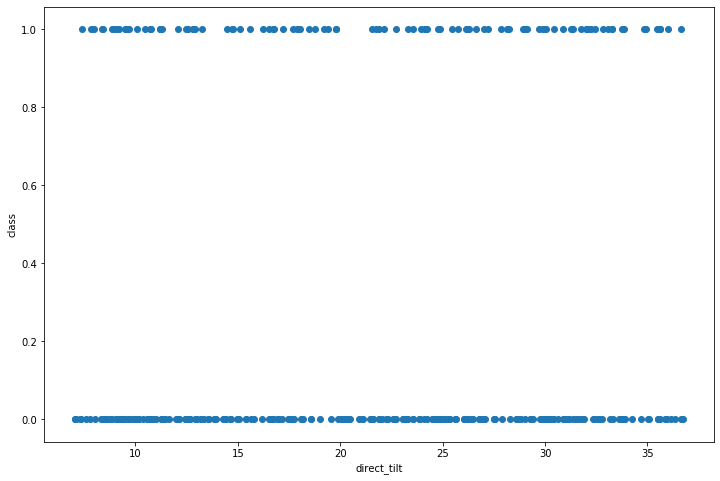

In [11]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(spine_data['direct_tilt'], spine_data['class'])

plt.xlabel('direct_tilt')
plt.ylabel('class')

In [12]:
spine_data_corr = spine_data.corr()

spine_data_corr

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743,0.043290,-0.078411,-0.089740,0.016750,0.019240,-0.007251,-0.353336
pelvic tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862,0.008852,-0.072119,-0.063394,0.028931,0.032859,-0.056550,-0.326063
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667,0.029486,-0.112939,-0.063582,0.063875,0.057199,-0.049054,-0.312484
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557,0.048988,-0.046914,-0.067968,-0.000063,0.000207,0.032853,-0.210602
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065,0.015767,0.063433,0.060477,-0.039800,0.029738,-0.030145,0.309857
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000,0.085925,-0.063812,-0.057286,0.056576,0.023021,-0.041023,-0.443687
pelvic_slope,0.043290,0.008852,0.029486,0.048988,0.015767,0.085925,1.000000,0.012694,-0.011770,0.088017,0.060743,-0.073893,-0.055865
direct_tilt,-0.078411,-0.072119,-0.112939,-0.046914,0.063433,-0.063812,0.012694,1.000000,0.009887,0.072738,-0.037428,-0.024021,0.039591
thoracic_slope,-0.089740,-0.063394,-0.063582,-0.067968,0.060477,-0.057286,-0.011770,0.009887,1.000000,0.052451,0.011354,0.009541,0.049354
cervical_tilt,0.016750,0.028931,0.063875,-0.000063,-0.039800,0.056576,0.088017,0.072738,0.052451,1.000000,0.057451,0.021243,-0.100044


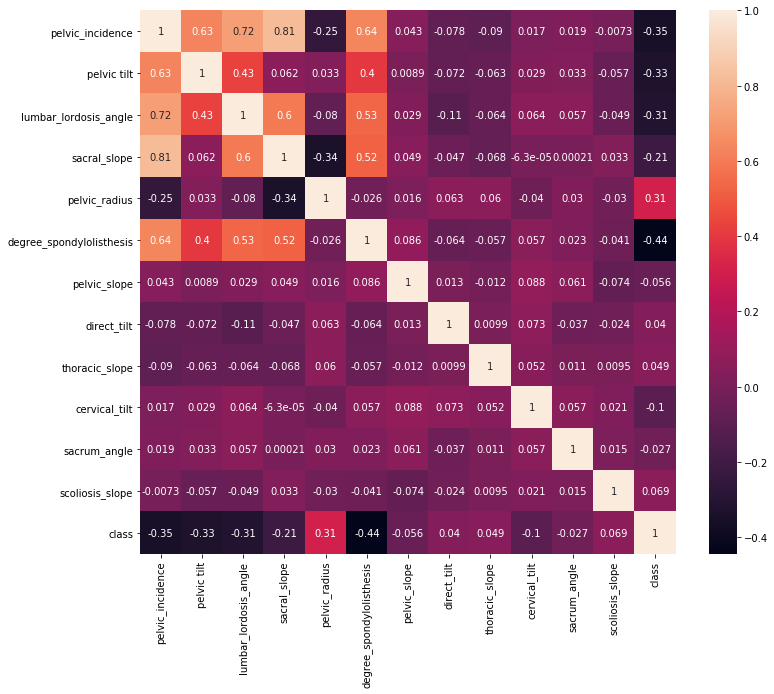

In [13]:
fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(spine_data_corr, annot=True)

In [14]:
from sklearn.model_selection import train_test_split

X = spine_data.drop('class', axis=1)
Y = spine_data['class']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.20)

In [15]:
x_train.shape, y_train.shape

((248, 12), (248,))

In [16]:
x_test.shape, y_test.shape

((62, 12), (62,))

In [17]:
from sklearn.neural_network import MLPClassifier

In [38]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(100, 100 ), 
                    max_iter=1000, 
                    activation = 'logistic',
                    alpha=0.001,
                    solver='lbfgs', 
                    verbose=True)

In [39]:
mlp_clf.fit(x_train, y_train) # trains data

MLPClassifier(activation='logistic', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [40]:
y_pred = mlp_clf.predict(x_test)

In [41]:
pred_results = pd.DataFrame({'y_test': y_test,
                             'y_pred': y_pred})

pred_results.sample(10)

,y_test,y_pred
299,1,0
304,0,0
113,0,0
103,0,0
2,0,1
265,1,0
147,0,0
238,1,0
253,0,0
213,0,1


In [42]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8064516129032258

In [43]:
spine_data_crosstab = pd.crosstab(pred_results.y_test, pred_results.y_pred)

spine_data_crosstab

y_pred,0,1
y_test,,
0,39,6
1,6,11


In [44]:
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
print(confusion_matrix(y_test, y_pred))

[[39  6]
 [ 6 11]]


In [46]:
print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

           0       0.87      0.87      0.87        45
           1       0.65      0.65      0.65        17

    accuracy                           0.81        62
   macro avg       0.76      0.76      0.76        62
weighted avg       0.81      0.81      0.81        62

